# Interpolation and fitting by polynomial

In [41]:
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt

Let us generate the data as in the book.

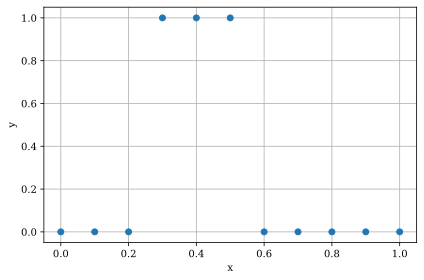

In [42]:
m = 11
x = np.linspace(0.0, 1.0, m)
y = 0*x
y[3:6] = 1.0
plt.plot(x,y,'o')
plt.xlabel("x"); plt.ylabel("y"); plt.grid(True);

## Polynomial interpolation

We solve the matrix problem using [numpy.linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html).

In [43]:
A = np.empty((m,m))
for i in range(m):
    A[i,:] = x[i]**np.arange(0,m)
cint = np.linalg.solve(A,y)

The following function evaluates the polynomial with coefficients in the array `c`.

In [44]:
# c = polynomial coefficients, m = len(c)
# Computes degree m-1 polynomial
#    y = sum(i=0,m-1) c[i] * x**i
def p(c,x):
    m = len(c)
    y = 0*x
    for i in range(m):
        y += c[i] * x**i
    return y

Let us plot the polynomial on a finer set of points.

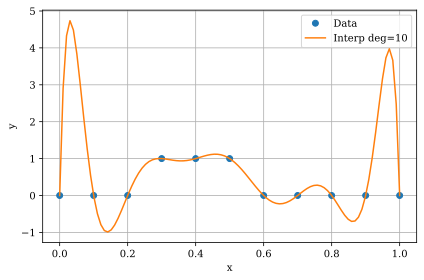

In [45]:
xc = np.linspace(0.0, 1.0, 100)
plt.plot(x,y,'o',label='Data')
plt.plot(xc,p(cint,xc),label='Interp deg='+str(m-1))
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.grid(True)

## Polynomial least squares fit

We solve the least squares problem using [numpy.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).

In [46]:
n = 8
A = np.empty((m,n))
for i in range(m):
    A[i,:] = x[i]**np.arange(0,n)
cls,res,rank,s = np.linalg.lstsq(A,y,rcond=None)

Let us plot the interpolating and least squares polynomials.

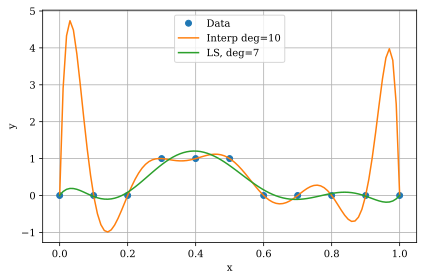

In [47]:
plt.plot(x,y,'o',label='Data')
plt.plot(xc,p(cint,xc),label='Interp deg='+str(m-1))
plt.plot(xc,p(cls,xc),label='LS, deg='+str(n-1))
plt.xlabel("x"); plt.ylabel("y")
plt.legend()
plt.grid(True)

## Fitting a straight line

We have some data $(x_i, y_i)$ and we expect a linear relationship between $x$ and $y$

$$
y = c_0 + c_1 x
$$

But the data $y_i$ possibly has some error.

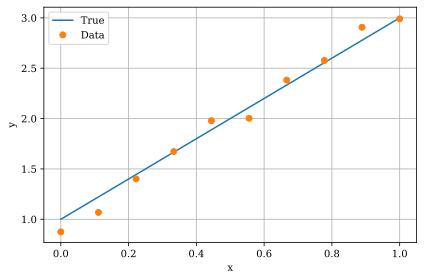

In [48]:
c0 = 1.0
c1 = 2.0

m = 10
x = np.linspace(0.0, 1.0, m)
yt = c0 + c1 * x
plt.plot(x, yt, '-',label='True')
y = yt + 0.2 * (2 * np.random.rand(m) - 1)
plt.plot(x, y, 'o',label='Data')
plt.legend(); plt.grid(True)
plt.xlabel("x"); plt.ylabel("y");

Let us estimate $c_0, c_1$ using least squares fitting.

In [49]:
n = 2
A = np.empty((m,n))
A[:,0] = 1.0
A[:,1] = x
c,res,rank,s = np.linalg.lstsq(A,y,rcond=None)
print('c0 = ', c[0])
print('c1 = ', c[1])

c0 =  0.8961256684285495
c1 =  2.17853086802892


Plot the fitted line and compare with data and true function.

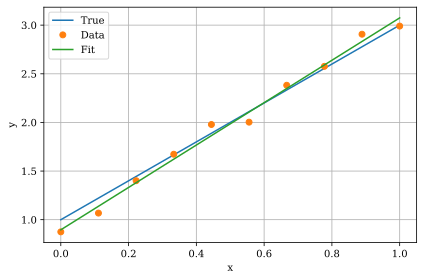

In [50]:
yf = c[0] + c[1] * x
plt.plot(x, yt, '-', label='True')
plt.plot(x, y, 'o',label='Data')
plt.plot(x, yf, '-', label='Fit')
plt.legend(); plt.grid(True)
plt.xlabel("x"); plt.ylabel("y");